In [2]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Create a set of random latitudes and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#Import citipy
from citipy import citipy

In [6]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
#Import the reqeusts library.
import requests

#Import the API key.
from config import weather_api_key

In [8]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | sorong
Processing Record 3 of Set 1 | tevaitoa
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | yinchuan
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | ucluelet
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | dapaong
Processing Record 17 of Set 1 | nesbyen
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | chifeng
Processing Record 21 of Set 1 | worthington
Processing Record 22 of Set 1 | firminy
Processing Record 23 of Set 1

Processing Record 40 of Set 4 | cocula
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | whyalla
Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | los llanos de aridane
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | qeshm
Processing Record 47 of Set 4 | dabra
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | mau aima
City not found. Skipping...
Processing Record 1 of Set 5 | arman
Processing Record 2 of Set 5 | mujiayingzi
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | martapura
Processing Record 5 of Set 5 | zhigansk
Processing Record 6 of Set 5 | meyungs
City not found. Skipping...
Processing Record 7 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 5 | vostok
Processing Record 10 of Set 5 | kseny

Processing Record 27 of Set 8 | muisne
Processing Record 28 of Set 8 | svetlogorsk
Processing Record 29 of Set 8 | susangerd
Processing Record 30 of Set 8 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 31 of Set 8 | felanitx
Processing Record 32 of Set 8 | keetmanshoop
Processing Record 33 of Set 8 | phuket
Processing Record 34 of Set 8 | hare bay
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | lakselv
Processing Record 38 of Set 8 | balagansk
Processing Record 39 of Set 8 | shagonar
Processing Record 40 of Set 8 | lieksa
Processing Record 41 of Set 8 | batemans bay
Processing Record 42 of Set 8 | gizo
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | kysyl-syr
Processing Record 45 of Set 8 | kasane
Processing Record 46 of Set 8 | arlit
Processing Record 47 of Set 8 | great yarmouth
Processing Record 48 of Set 8 | mitchell
Processing Record 49 of Set 8 | daloa
Processing Record 50

Processing Record 16 of Set 12 | markova
Processing Record 17 of Set 12 | linjiang
Processing Record 18 of Set 12 | ciudad bolivar
Processing Record 19 of Set 12 | muros
Processing Record 20 of Set 12 | tagusao
Processing Record 21 of Set 12 | bauchi
Processing Record 22 of Set 12 | bamiantong
Processing Record 23 of Set 12 | tartagal
Processing Record 24 of Set 12 | furano
Processing Record 25 of Set 12 | sedalia
Processing Record 26 of Set 12 | nicolas bravo
Processing Record 27 of Set 12 | axim
Processing Record 28 of Set 12 | atambua
Processing Record 29 of Set 12 | mbour
Processing Record 30 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 31 of Set 12 | marcona
City not found. Skipping...
Processing Record 32 of Set 12 | kolondieba
Processing Record 33 of Set 12 | nakhon si thammarat
Processing Record 34 of Set 12 | pontes e lacerda
Processing Record 35 of Set 12 | sao joao da barra
Processing Record 36 of Set 12 | palabuhanratu
City not found. Skipping...
Proce

In [11]:
len(city_data)

547

In [12]:
city_data

[{'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 38.82,
  'Humidity': 87,
  'Cloudiness': 40,
  'Wind Speed': 1.14,
  'Country': 'AR',
  'Date': '2021-07-24 16:20:40'},
 {'City': 'Sorong',
  'Lat': -0.8833,
  'Lng': 131.25,
  'Max Temp': 77.49,
  'Humidity': 85,
  'Cloudiness': 100,
  'Wind Speed': 16.62,
  'Country': 'ID',
  'Date': '2021-07-24 16:22:02'},
 {'City': 'Tevaitoa',
  'Lat': -16.7833,
  'Lng': -151.5,
  'Max Temp': 77.74,
  'Humidity': 63,
  'Cloudiness': 4,
  'Wind Speed': 12.97,
  'Country': 'PF',
  'Date': '2021-07-24 16:22:03'},
 {'City': 'Dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': 37.87,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 30.58,
  'Country': 'RU',
  'Date': '2021-07-24 16:22:03'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 78.12,
  'Humidity': 55,
  'Cloudiness': 1,
  'Wind Speed': 5.99,
  'Country': 'US',
  'Date': '2021-07-24 16:18:42'},
 {'City': 'Bethel',
  'Lat': 41.3712,
  'Lng':

In [13]:
#Convert the array of dictionaries top a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.82,87,40,1.14,AR,2021-07-24 16:20:40
1,Sorong,-0.8833,131.2500,77.49,85,100,16.62,ID,2021-07-24 16:22:02
2,Tevaitoa,-16.7833,-151.5000,77.74,63,4,12.97,PF,2021-07-24 16:22:03
3,Dikson,73.5069,80.5464,37.87,96,100,30.58,RU,2021-07-24 16:22:03
4,Jamestown,42.0970,-79.2353,78.12,55,1,5.99,US,2021-07-24 16:18:42
5,Bethel,41.3712,-73.4140,82.72,51,1,1.01,US,2021-07-24 16:22:04
6,Victoria,22.2855,114.1577,87.85,88,88,1.01,HK,2021-07-24 16:19:08
7,Hasaki,35.7333,140.8333,73.80,83,0,5.99,JP,2021-07-24 16:22:04
8,Butaritari,3.0707,172.7902,83.37,72,0,15.30,KI,2021-07-24 16:22:05
9,Geraldton,-28.7667,114.6000,54.01,94,90,6.91,AU,2021-07-24 16:22:05


In [14]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,38.82,87,40,1.14,AR,2021-07-24 16:20:40
1,Sorong,-0.8833,131.2500,77.49,85,100,16.62,ID,2021-07-24 16:22:02
2,Tevaitoa,-16.7833,-151.5000,77.74,63,4,12.97,PF,2021-07-24 16:22:03
3,Dikson,73.5069,80.5464,37.87,96,100,30.58,RU,2021-07-24 16:22:03
4,Jamestown,42.0970,-79.2353,78.12,55,1,5.99,US,2021-07-24 16:18:42
...,...,...,...,...,...,...,...,...,...
542,Petrivka,46.9695,30.9591,79.25,36,0,3.67,UA,2021-07-24 16:24:52
543,Port Arthur,38.8000,121.2667,79.92,54,5,5.03,CN,2021-07-24 16:24:52
544,Banda Aceh,5.5577,95.3222,81.32,78,99,10.22,ID,2021-07-24 16:24:53
545,Bacong,9.2464,123.2956,79.12,83,26,10.13,PH,2021-07-24 16:24:53


In [16]:
#Reorder the columns 
city_data_df_new_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-07-24 16:20:40,-54.8000,-68.3000,38.82,87,40,1.14
1,Sorong,ID,2021-07-24 16:22:02,-0.8833,131.2500,77.49,85,100,16.62
2,Tevaitoa,PF,2021-07-24 16:22:03,-16.7833,-151.5000,77.74,63,4,12.97
3,Dikson,RU,2021-07-24 16:22:03,73.5069,80.5464,37.87,96,100,30.58
4,Jamestown,US,2021-07-24 16:18:42,42.0970,-79.2353,78.12,55,1,5.99
...,...,...,...,...,...,...,...,...,...
542,Petrivka,UA,2021-07-24 16:24:52,46.9695,30.9591,79.25,36,0,3.67
543,Port Arthur,CN,2021-07-24 16:24:52,38.8000,121.2667,79.92,54,5,5.03
544,Banda Aceh,ID,2021-07-24 16:24:53,5.5577,95.3222,81.32,78,99,10.22
545,Bacong,PH,2021-07-24 16:24:53,9.2464,123.2956,79.12,83,26,10.13


In [19]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


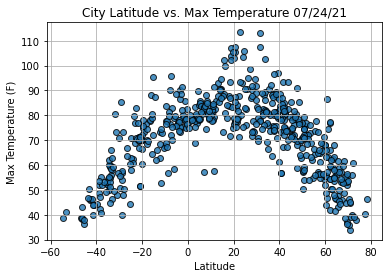

In [31]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#show plot.
plt.show()

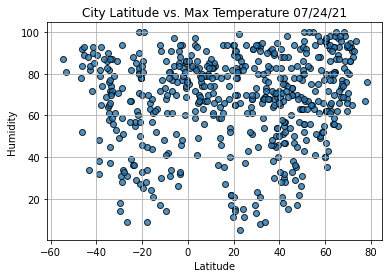

In [32]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#show plot.
plt.show()

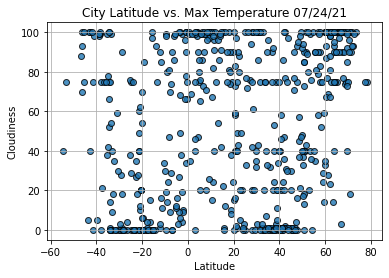

In [33]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#show plot.
plt.show()

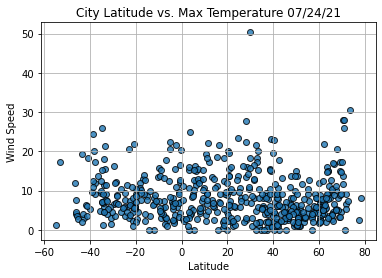

In [34]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#show plot.
plt.show()